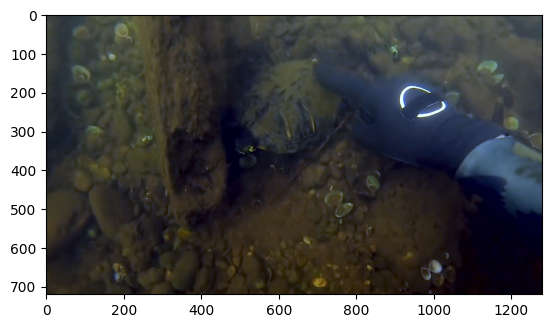

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def variational_contrast_saturation_enhancement(image, alpha, beta):
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    
    l_channel = variational_contrast_enhancement(l_channel, alpha, beta)

    enhanced_lab_image = cv2.merge([l_channel, a_channel, b_channel])
    enhanced_image = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2BGR)

    return enhanced_image

def variational_contrast_enhancement(channel, alpha, beta):
    enhanced_channel = np.clip(alpha * channel + beta, 0, 255).astype(np.uint8)
    return enhanced_channel

def sharpen_image(image, alpha, beta, iterations):
    for i in range(iterations):
        sharpened_image = variational_contrast_saturation_enhancement(image, alpha, beta)
        alpha += 0.1  # Increase alpha
        beta -= 0.1   # Decrease beta
        plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
        plt.show()
    return sharpened_image

if __name__ == "__main__":
    input_image = cv2.imread('C:/College Projects/Applied LA for ML/gray_world_image.png')
    
    # Initial alpha and beta values
    alpha = 1.3
    beta = -20
    iterations = 1

    sharpened_image = sharpen_image(input_image, alpha, beta, iterations)


